In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
goog_data = pd.read_csv('GOOG.csv', index_col='Date', parse_dates=True)

<h2> Absolute Price Oscillator (APO)</h2>

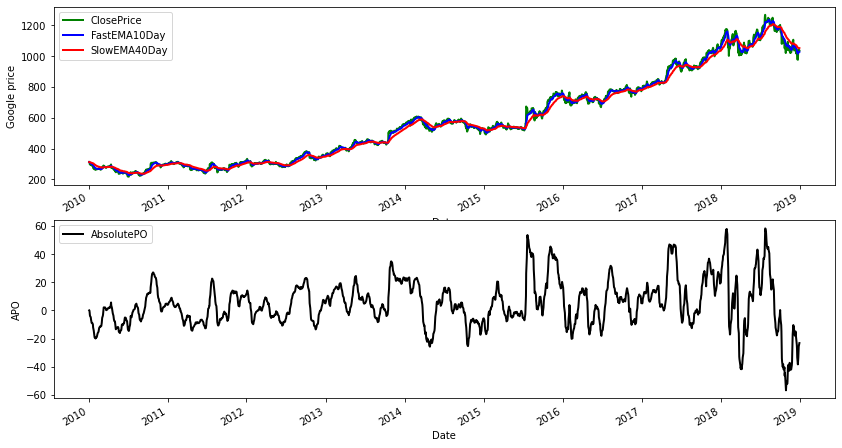

In [15]:
num_periods_fast = 10 #Time period for fast EMA
k_fast = 2 / (num_periods_fast + 1) #Smothing factor for fast EMA
ema_fast = 0

num_periods_slow = 40
k_slow = 2 / (num_periods_slow + 1)
ema_slow = 0

ema_fast_values = []
ema_slow_values = []
apo_values = []
close = goog_data['Adj Close']


for close_price in close:
    if (ema_fast == 0): #First observation
        ema_fast = close_price
        ema_slow = close_price
    else:
        ema_fast = (close_price - ema_fast) * k_fast + ema_fast
        ema_slow = (close_price - ema_slow) * k_slow +ema_slow

    ema_fast_values.append(ema_fast)
    ema_slow_values.append(ema_slow)
    apo_values.append(ema_fast - ema_slow)

#Dataframe Manipulation
goog_data = goog_data.assign(ClosePrice = pd.Series(close, index=goog_data.index))
goog_data = goog_data.assign(FastEMA10Day = pd.Series(ema_fast_values, index=goog_data.index))
goog_data = goog_data.assign(SlowEMA40Day = pd.Series(ema_slow_values, index=goog_data.index))
goog_data = goog_data.assign(AbsolutePO = pd.Series(apo_values, index=goog_data.index))
close_price = goog_data['ClosePrice']
ema_f = goog_data['FastEMA10Day']
ema_s = goog_data['SlowEMA40Day']
apo = goog_data['AbsolutePO']

#Visalization
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(211, ylabel='Google price')
close_price.plot(ax=ax1, color='g', lw=2, legend=True)
ema_f.plot(ax=ax1, color='b', lw=2, legend=True)
ema_s.plot(ax=ax1, color='r', lw=2, legend=True)
ax2 = fig.add_subplot(212, ylabel ='APO')
apo.plot(ax=ax2, color='black', lw=2, legend=True)
plt.legend();

<h2>Absolute Price Oscillator (APO) -Short Code</h2>

In [16]:
goog_data = pd.read_csv('GOOG.csv', index_col='Date', parse_dates=True)

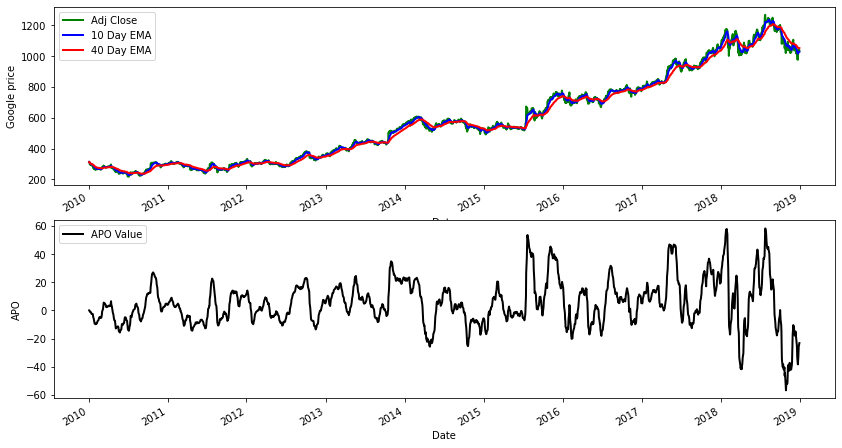

In [24]:
goog_data['10 Day EMA'] = goog_data['Adj Close'].ewm(span=10).mean()
goog_data['40 Day EMA'] = goog_data['Adj Close'].ewm(span=40).mean()
goog_data['APO Value'] = goog_data['10 Day EMA'] -  goog_data['40 Day EMA']
#Visualization
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(211, ylabel='Google price')
goog_data['Adj Close'].plot(ax=ax1, color='g', lw=2, legend=True)
goog_data['10 Day EMA'].plot(ax=ax1, color='b', lw=2, legend=True)
goog_data['40 Day EMA'].plot(ax=ax1, color='r', lw=2, legend=True)
ax2 = fig.add_subplot(212, ylabel ='APO')
goog_data['APO Value'].plot(ax=ax2, color='black', lw=2, legend=True)
plt.legend();